# Problem set 4


[Aaron Zhao]

[Education and Confidence in Education] 

[03/18/2024]

## 1. Visually assess heteroscedasticity [1 pt]

    A. Create a scatterplot of a dependent variable and independent variable of interest from a dataset of your choice.
    
    B. Include a fitted line with an area graph of the confidence interval for the prediction.
    
    C. Write a couple sentences describing how the distribution of the data in the graph does or does not appear to be heteroscedastic.

In [1]:
set maxvar 120000
use "/Users/aaronzhao/Desktop/Desktop/GSS_stata 3/gss7222_r2.dta", clear
eststo clear

In [2]:
keep coneduc educ

In [3]:
codebook coneduc educ


-------------------------------------------------------------------------------
coneduc                                                 confidence in education
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: INSTCONF

                 Range: [1,3]                         Units: 1
         Unique values: 3                         Missing .: 0/72,390
       Unique mv codes: 4                        Missing .*: 23,990/72,390

            Tabulation: Freq.   Numeric  Label
                       13,856         1  a great deal
                       27,230         2  only some
                        7,314         3  hardly any
                          555        .d  don't know
                       23,292        .i  iap
                          122        .n  no answer
                           21        .s  skipped on web

-------------------------------------------------------------------

In [4]:
gen coneducation=.  //higher values=more confidence
recode coneducation .=1 if coneduc==3
recode coneducation .=2 if coneduc==2 
recode coneducation .=3 if coneduc==1
label values coneducation confmt
label var coneducation "Confidence in Education"
tab coneduc coneducation, m

(72,390 missing values generated)
(7,314 changes made to coneducation)
(27,230 changes made to coneducation)
(13,856 changes made to coneducation)

        confidence in |           Confidence in Education
            education |         1          2          3          . |     Total
----------------------+--------------------------------------------+----------
         a great deal |         0          0     13,856          0 |    13,856 
            only some |         0     27,230          0          0 |    27,230 
           hardly any |     7,314          0          0          0 |     7,314 
           don't know |         0          0          0        555 |       555 
                  iap |         0          0          0     23,292 |    23,292 
            no answer |         0          0          0        122 |       122 
       skipped on web |         0          0          0         21 |        21 
----------------------+--------------------------------------------+--------

In [5]:
%set graph_height = 8

graph size was (5.5in, 4in), is now (5.5in, 8).


In [6]:
%set graph_width = 11

graph size was (5.5in, 8), is now (11, 8).


(note: scheme 538w not found, using s2color)


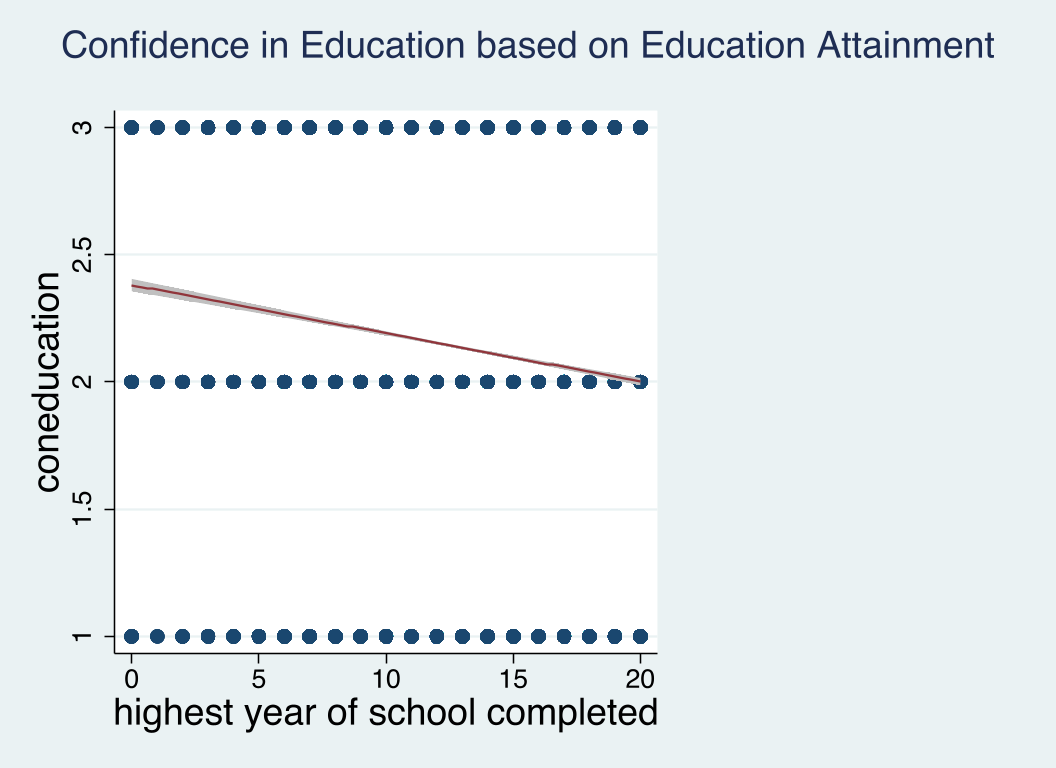

In [7]:
tw (scatter coneducation educ) ///
(lfitci coneducation educ), ///
ytitle(coneducation, size(large)) ///
xtitle(,size(large)) legend(off) scheme(538w) ///
title("Confidence in Education based on Education Attainment" " ", span size(large)) ///
aspect(1, place(west))

In [ ]:
PART C: Interpretating heteroscedasticity

In the plot I have generated, the vertical spread of the points does not seem to change systematically across the categories
of education attainment. The scatter appears relatively constant. There appears to be no heteroscedasticity happening.

## 2. Test for heteroscedasticity [1 pt]

    A. Do a Breusch-Pagan postestimation test for heteroscedasticity in your dependent variable and independent variable relationship.

    B. Reestimate the regression after logging the DV or IV if appropriate and do another Breusch-Pagan test. Does logging reduce heteroscedasticity?

In [8]:
quietly reg coneducation educ
estat hettest


Breusch–Pagan/Cook–Weisberg test for heteroskedasticity 
Assumption: Normal error terms
Variable: Fitted values of coneducation

H0: Constant variance

    chi2(1) =  91.27
Prob > chi2 = 0.0000


As I only have one independent variable in my model, being educational attainment, it is natural that my degree of freedom is 1. Since my p-value of 0.0000 is less than 0.05, I am rejecting the null hypothesis of constant variance. There is satatistically significant evidence of heteroscedasticity in my model.

Dont need log because my variable does not require it. 

## 3. Boot strap your standard errors [1 pt.]

    A. Quietly reestimate your regression coefficient with convential OLS and store the results.
    
    B. Quietly reestimate your regression with bootstrapped standard errors and store the results.
    
    C. Use esttab to output the results of the two models and tell us how the bootstrap standard erros differ from the conventional results.
    
    D. Explain in your own words what the bootstrap procedure is doing and why it yields similar or different standard errors to the convential model.

In [9]:
eststo: quietly reg coneducation educ

(est1 stored)


In [10]:
eststo: quietly bootstrap _b[educ], rep(1000) nodots : ///
    reg coneducation educ

(est2 stored)


In [12]:
esttab, ///
mlabels("OLS" "Bootstrap") ///
collabels(none)  ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001)


--------------------------------------------
                      (1)             (2)   
                      OLS       Bootstrap   
--------------------------------------------
educ                -0.02***                
                   (0.00)                   
_bs_1                               -0.02***
                                   (0.00)   
_cons                2.38***                
                   (0.01)                   
--------------------------------------------
N                   48244           48244   
--------------------------------------------


There are no changes in the standard errors. As there is no change in my standard errors, the OLS is already robust on its own where the bootstrap sample that was generated is very similar to my original sample, which already provides good estimate of the variability in my data.

## 4. Estimate robust standard errors [1 pt]

    A. Reestimate your model with robust standard errors and store the results.
    
    B. Use esttab to output the results of the robust model alongside the conventional and bootstrap models and explain how the the results compare in 1 or 2 sentences.
    
    C. In your own words, explain how the robust standard errors procedure differs from conventional procedures.

In [13]:
eststo: quietly reg coneducation educ, robust

(est3 stored)


In [14]:
esttab, ///
mlabels("OLS" "Bootstrap" "Robust") ///
collabels(none)  ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001)


------------------------------------------------------------
                      (1)             (2)             (3)   
                      OLS       Bootstrap          Robust   
------------------------------------------------------------
educ                -0.02***                        -0.02***
                   (0.00)                          (0.00)   
_bs_1                               -0.02***                
                                   (0.00)                   
_cons                2.38***                         2.38***
                   (0.01)                          (0.01)   
------------------------------------------------------------
N                   48244           48244           48244   
------------------------------------------------------------


There is no change between my original model and the robust model, therefore the effect of heteroscedasticity (if it is present) may not be significant enough to affect the standard errors. Thus making the OLS method a good fit for this data.

## 5. Cluster robust standard errors [1 pt]

    A. Explain why or why not your model should be estimated with cluster robust standard errors. If yes, what is the clustering unit and why?
    
    As some GSS variables in the cross-sectional dataset are not collected across all the available years in the overall dataset (such as with Educational Attainment and Confidence in Education), as such I will skip doing the cluster robust standard errors. 
        
    B. If yes, reestimate your model with cluster robust standard errors and use esttab to output the results of the robust model alongside your other models and explain how the the results compare in 1 or 2 sentences.
    
    No, I do not need to do cluster robust standard errors. 
    
    C. Write a couple sentences explaining what is the best method of standard error estimation for your models and why.
    
    The best method of standard error estimation for my model is robust model. Robust is better for two reasons: I am using a large data from the GSS that captures a large scale of respondents and their educational attainment and confidence. Secondly, my model is linear, which the robust model is the best standard error estimation for.